In [1]:
import numpy as np
import math
import itertools

In [2]:
DEGTORAD = math.pi/180
Fs = [i/10 for i in range(-10,11,1)]
Fe = [i/100 for i in range(0,105,5)]
psi = [i*DEGTORAD for i in range(-15,16,1)]

In [3]:
action = []
for f in Fe:
    for p in psi:
        action.append([f,p])

In [80]:
action.extend(Fs)

In [81]:
len(action)

672

In [85]:
a,b = action[0]

In [39]:
action = []
for f in Fe:
    action.extend([f,p] for p in psi)
action.extend(Fe)

In [70]:
action = list(map(lambda x: [[x,p] for p in psi], [f for f in Fe]))

In [77]:
isinstance(action[670], list)

False

# Pickle Loading

In [25]:
%matplotlib inline
import _pickle
import pandas as pd
import plotty
import matplotlib.pyplot as plt

In [9]:
data = _pickle.load(open("C://Users//REUBS_LEN//PycharmProjects//RocketLanding//log.p",'rb'))

In [19]:
reward = []
theta = []
for r,t in data:
    reward.append(r)
    theta.append(t)

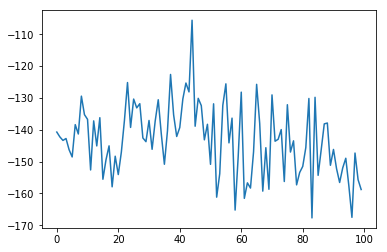

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(reward)

# Matrix Multiplication and Subtraction

In [1]:
import numpy as np

In [20]:
population = 100
states = 8
actions = 3

weights = np.zeros((states, actions))
rewards = np.random.rand(population)
noise = np.random.rand(population, states, actions)
standard_deviation = 0.1

In [21]:
weights

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [22]:
np.std(rewards)

0.29943408070378796

In [23]:
weights_ = weights + noise[0]*standard_deviation

In [28]:
noise.T.shape

(3, 8, 100)

In [27]:
np.dot(noise.T, rewards).shape

(3, 8)

In [46]:
a = np.arange(2*2*3).reshape(2,2,3)

In [47]:
b = np.arange(2*2*3).reshape(2,2,3)

In [48]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [49]:
b

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [60]:
np.dot(a.T,b)

array([[[[ 18,  24,  30],
         [ 54,  60,  66]],

        [[ 27,  39,  51],
         [ 99, 111, 123]]],


       [[[ 21,  29,  37],
         [ 69,  77,  85]],

        [[ 30,  44,  58],
         [114, 128, 142]]],


       [[[ 24,  34,  44],
         [ 84,  94, 104]],

        [[ 33,  49,  65],
         [129, 145, 161]]]])

In [55]:
at = a.T
at

array([[[ 0,  6],
        [ 3,  9]],

       [[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]]])

In [56]:
np.dot(at[0], b[0])

array([[18, 24, 30],
       [27, 39, 51]])

In [57]:
at.shape

(3, 2, 2)

In [58]:
b.shape

(2, 2, 3)

# Numpy Tile and Time Varying Kinematics

In [1]:
import numpy as np

In [30]:
eps = 0.001

In [31]:
def swap_array_values(array, indices_to_swap):
    for i, j in indices_to_swap:
        array[i], array[j] = array[j], array[i]
    return array

In [33]:
state = [1, 2, 3, 4, 5, 6]
print(swap_array_values(state, [(0,1),(1,2)]))

[2, 3, 1, 4, 5, 6]


In [43]:
np.tile(state, (6,1)).T

array([[2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1],
       [4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6]])

In [37]:
np.eye(6)*eps

array([[ 0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.001,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001]])

In [47]:
tiled_state = np.tile(state, (6,1)).T
x1 = tiled_state + np.eye(6)*eps
x2 = tiled_state - np.eye(6)*eps
x1.shape
xnext = np.zeros(x1.shape)
xnext

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
action = [0.2,0.1,0.001]
np.tile(action, (6,1))

array([[ 0.2  ,  0.1  ,  0.001],
       [ 0.2  ,  0.1  ,  0.001],
       [ 0.2  ,  0.1  ,  0.001],
       [ 0.2  ,  0.1  ,  0.001],
       [ 0.2  ,  0.1  ,  0.001],
       [ 0.2  ,  0.1  ,  0.001]])

In [ ]:
uu = np.tile(action, (6,1))
f1 = evaluate_kinematics(x1, uu)
f2 = evaluate_kinematics(x2, uu)

def evaluate_kinematics(state, actions):
    Fe, Fs, psi = actions
    theta = self.state[THETA]
    # -----------------------------
    ddot_x = (Fe * theta + Fe * psi + Fs) / MASS
    ddot_y = (Fe - Fe * theta * psi - Fs * theta - MASS * GRAVITY) / MASS
    ddot_theta = (Fe * psi * (L1 + LN) - L2 * Fs) / INERTIA
    return ddot_x, ddot_y, ddot_theta

In [ ]:
f1 = self.plant_dynamics(x1, uu)
f2 = self.plant_dynamics(x2, uu)
A = (f1 - f2) / 2 / eps

In [49]:
s1 = [-0.0001814871123342803, 1.2166445136792732, -0.08513823673129081, -3.0468390464782713, 0.0005694212159141898, 0.009609001378218332, 0.0, 0.0]
s2 = [-0.00035996870561079544, 1.2023621715198862, -0.08431581258773804, -3.064364941914876, 0.0011283052153885365, 0.010391778002182642, 0.0, 0.0]
s3 = [-0.000551281553326231, 1.188042491566051, -0.08415119498968124, -3.0723668734232583, 0.0016457976307719946, 0.010588462154070536, 0.0, 0.0]

# LQR

In [18]:
%matplotlib inline
from matplotlib.pyplot import * # Grab MATLAB plotting functions
from numpy import *
from control.matlab import *    # MATLAB-like functions

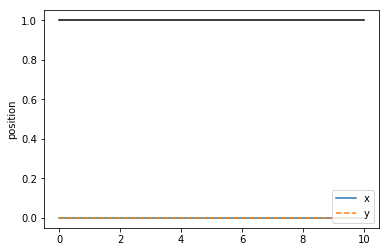

In [138]:
m = 25.22
l1 = 3.8667
ls = 3.7
ln = 0.189
l = l1+ln
I = 482.2956
g = 9.81
m_fuel = 1.261

# State space dynamics
xe = [0, 0, 0, 0, 0, 0];        # equilibrium point of interest
ue = [m*g, 0, 0];               # (note these are lists, not matrices)

# Dynamics matrix (use matrix type so that * works for multiplication)
a = ue[0]*cos(xe[4])/m - ue[1]*sin(xe[4])/m - ue[2]*sin(xe[4])/m
b = ue[0]*sin(xe[4])/m - ue[1]*cos(xe[4])/m - ue[2]*cos(xe[4])/m
A = matrix(
   [[ 0,    0,    0,    1,    0,    0],
    [ 0,    0,    0,    0,    1,    0],
    [ 0,    0,    0,    0,    0,    1],
    [ 0,    0,    a,    0,    0,    0],
    [ 0,    0,    b,    0,    0,    0],
    [ 0,    0,    0,    0,    0,    0 ]])

# Input matrix
B = matrix(
   [[0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [sin(xe[4])/m, cos(xe[4])/m, cos(xe[4])/m],
    [cos(xe[4])/m, -sin(xe[4])/m, -sin(xe[4])/m],
    [0, -l1/I, ls/I]])

# Output matrix 
C = matrix([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]])
D = matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

Qx1 = diag([1, 1, 1, 1, 1, 1]);
Qu1a = 0.1*diag([1, 1, 1]);
(K, X, E) = lqr(A, B, Qx1, Qu1a); K1a = matrix(K);

xd = matrix([[1], [0], [0], [0], [0], [0]]); 
yd = matrix([[0], [1], [0], [0], [0], [0]]);  

# Indices for the parts of the state that we want
lat = (0,2,3,5);
alt = (1,4);

# Decoupled dynamics
Ax = (A[lat, :])[:, lat];       #! not sure why I have to do it this way
Bx = B[lat, 0]; Cx = C[0, lat]; Dx = D[0, 0];
 
Ay = (A[alt, :])[:, alt];       #! not sure why I have to do it this way
By = B[alt, 1]; Cy = C[1, alt]; Dy = D[1, 1];

# Step response for the first input
H1ax = ss(Ax - Bx*K1a[0,lat], Bx*K1a[0,lat]*xd[lat,:], Cx, Dx);
(Tx, Yx) = step(H1ax, T=linspace(0,10,100));

# Step response for the second input
H1ay = ss(Ay - By*K1a[1,alt], By*K1a[1,alt]*yd[alt,:], Cy, Dy);
(Ty, Yy) = step(H1ay, T=linspace(0,10,100));

plot(Yx, Tx, '-', Yy, Ty, '--');
plot([0, 10], [1, 1], 'k-');
ylabel('position');
legend(('x', 'y'), loc='lower right');

In [131]:
A

matrix([[ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
        [ 0.  ,  0.  ,  9.81,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

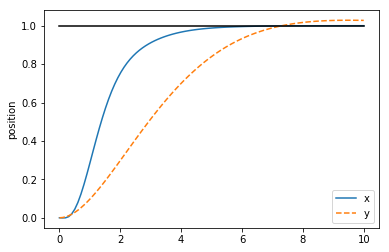

In [132]:
m = 4;                         # mass of aircraft
J = 0.0475;                    # inertia around pitch axis
r = 0.25;                      # distance to center of force
g = 9.8;                       # gravitational constant
c = 0.05;                      # damping factor (estimated)

# State space dynamics
xe = [0, 0, 0, 0, 0, 0];        # equilibrium point of interest
ue = [0, m*g];                  # (note these are lists, not matrices)

# Dynamics matrix (use matrix type so that * works for multiplication)
A = matrix(
   [[ 0,    0,    0,    1,    0,    0],
    [ 0,    0,    0,    0,    1,    0],
    [ 0,    0,    0,    0,    0,    1],
    [ 0, 0, (-ue[0]*sin(xe[2]) - ue[1]*cos(xe[2]))/m, -c/m, 0, 0],
    [ 0, 0, (ue[0]*cos(xe[2]) - ue[1]*sin(xe[2]))/m, 0, -c/m, 0],
    [ 0,    0,    0,    0,    0,    0 ]])

# Input matrix
B = matrix(
   [[0, 0], [0, 0], [0, 0],
    [cos(xe[2])/m, -sin(xe[2])/m],
    [sin(xe[2])/m,  cos(xe[2])/m],
    [r/J, 0]])

# Output matrix 
C = matrix([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
D = matrix([[0, 0], [0, 0]])

Qx1 = diag([1, 1, 1, 1, 1, 1]);
Qu1a = diag([1, 1]);
(K, X, E) = lqr(A, B, Qx1, Qu1a); K1a = matrix(K);

xd = matrix([[1], [0], [0], [0], [0], [0]]); 
yd = matrix([[0], [1], [0], [0], [0], [0]]); 

# Indices for the parts of the state that we want
lat = (0,2,3,5);
alt = (1,4);

# Decoupled dynamics
Ax = (A[lat, :])[:, lat];       #! not sure why I have to do it this way
Bx = B[lat, 0]; Cx = C[0, lat]; Dx = D[0, 0];
 
Ay = (A[alt, :])[:, alt];       #! not sure why I have to do it this way
By = B[alt, 1]; Cy = C[1, alt]; Dy = D[1, 1];

# Step response for the first input
H1ax = ss(Ax - Bx*K1a[0,lat], Bx*K1a[0,lat]*xd[lat,:], Cx, Dx);
(Tx, Yx) = step(H1ax, T=linspace(0,10,100));

# Step response for the second input
H1ay = ss(Ay - By*K1a[1,alt], By*K1a[1,alt]*yd[alt,:], Cy, Dy);
(Ty, Yy) = step(H1ay, T=linspace(0,10,100));

plot(Yx, Tx, '-', Yy, Ty, '--');
plot([0, 10], [1, 1], 'k-');
ylabel('position');
legend(('x', 'y'), loc='lower right');

# Polynomial Fit

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [232]:
x = [16.5, 20]
y = [6, 14]
[a, b] = np.polyfit(x,y,deg=1)

def fitPolyline(x, y, deg):
    return np.polyfit(x,y,deg=deg)

In [34]:
xx = np.linspace(16, 20, 17)
yy = (xx)*a + b

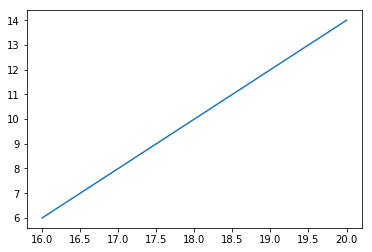

In [30]:
plt.plot(xx,yy)

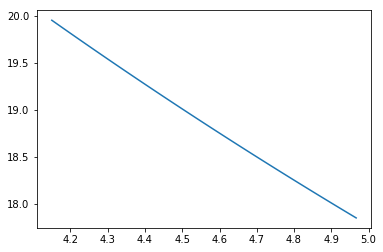

In [226]:
x_time = np.arange(0,30,1/60)
y_target_profile = 32*np.exp(-0.2*x_time)+6



c = np.where(y==np.extract(y < 20, y)[0])[0][0]

plt.plot(x_time[c:c+50],y_target_profile[c:c+50])

In [261]:
def guidance_target(state, final_x, y_profile, current_time_iteration, time_horizon, time_step, polyfit, state_len=6):
    current_x, current_y, current_theta = state[0], state[1], state[4]

    time_offset = current_time_iteration*time_step
    targets = np.zeros((6, time_horizon-1))
     
    y_index = np.where(y_profile==np.extract(y_profile <= current_y, y_profile)[0])[0][0]

    m,c = polyfit

    alpha = 0.1
    beta = 3
    gamma = 0.5
    y = current_y
   
    delta_t = [t*time_step for t in range(1, time_horizon)]
    y = y_profile[y_index:y_index+time_horizon]
    x =  (y-c)/m # y = mx + c
    y_dot = -0.5*np.sqrt(abs(y))
    x_dot = (x-final_x)
   
    theta = current_theta*np.exp(-beta*delta_t)
    theta_dot = gamma*theta

    targets = [x,y,x_dot,y_dot,theta,theta_dot]
    return targets, delta_t

In [264]:
state = [15,20,2,-2,0.1,0.1]
targets, delta_t = guidance_target(state=state, final_x=16.5, y_profile=y_target_profile,
                          current_time_iteration=200, time_horizon=50, time_step=1/60, polyfit=[a, b])

array([ 0.10168063,  0.10338951,  0.10512711,  0.10689391,  0.1086904 ,
        0.11051709,  0.11237448,  0.11426308,  0.11618342,  0.11813604,
        0.12012147,  0.12214028,  0.12419301,  0.12628023,  0.12840254,
        0.13056052,  0.13275476,  0.13498588,  0.1372545 ,  0.13956124,
        0.14190675,  0.14429169,  0.1467167 ,  0.14918247,  0.15168968,
        0.15423903,  0.15683122,  0.15946698,  0.16214703,  0.16487213,
        0.16764302,  0.17046049,  0.1733253 ,  0.17623826,  0.17920018,
        0.18221188,  0.18527419,  0.18838797,  0.19155408,  0.1947734 ,
        0.19804683,  0.20137527,  0.20475965,  0.20820091,  0.2117    ,
        0.2152579 ,  0.2188756 ,  0.22255409,  0.22629441])

## Plotting

In [10]:
import seaborn as sns
import pandas as pd

In [20]:
x = [i for i in range(100)]
y = [x**2 for x in range(100)]
data = pd.DataFrame([y, x], x, columns=['y'])
sns.lmplot(data=data)

AssertionError: 1 columns passed, passed data had 100 columns

In [7]:
df = sns.load_dataset("anscombe")

In [16]:
tips = sns.load_dataset("tips")

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [19]:
data

,y
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81


In [25]:
import numpy as np

int(str(1)+str(1)+str(1))

111

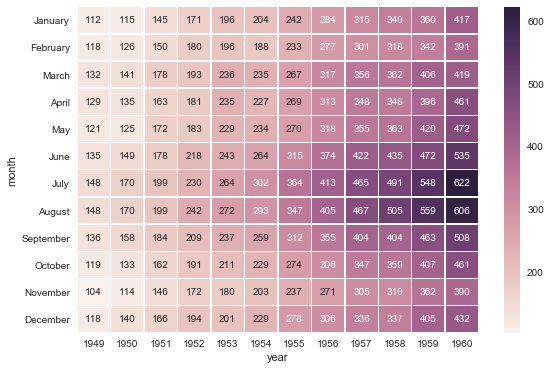

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [29]:
flights = flights_long.pivot("month", "year", "passengers")

In [35]:
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [36]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


## Defining a cost function for the simulations

In [10]:
import numpy as np
from constants import *

In [11]:
s = [10, 1, 2, 2, 4, 5]
s_max = [30, 2, 2, 3, 5, 7]
ss = np.array(s_max)-np.array(s)
G = np.eye(6)*5
np.sqrt(np.dot(np.dot(ss,G), ss))

45.110974274559844

In [12]:
(ss/np.array(s_max))

array([ 0.66666667,  0.5       ,  0.        ,  0.33333333,  0.2       ,
        0.28571429])

In [43]:
state = [0,0,0,0,0,0]

untransformed_state = False

len_state = len(state)
cost_matrix = np.ones(len_state)*5
cost_matrix[XX] = 10
cost_matrix[X_DOT] = 10
cost_matrix[THETA_DOT] = 10

if untransformed_state is False:
    state_target = np.zeros(len_state)

ss = (state_target-abs(np.array(state)))
print(np.dot(ss,cost_matrix))

-10.0


In [44]:
s.append(120)

In [45]:
s


[10, 1, 2, 2, 4, 5, 120]

In [61]:
state_history = [[None]*4]*6

In [62]:
state_history[1] = [3]

In [63]:
state_history[1].append(3)

In [64]:
state_history

[[None, None, None, None],
 [3, 3],
 [None, None, None, None],
 [None, None, None, None],
 [None, None, None, None],
 [None, None, None, None]]

In [66]:
for i in range(4):
    print(i == 4)

False
False
False
False


In [117]:
number_of_tests = 3
state_history = [[] for _ in range(number_of_tests)]
all_results = [[None]]*number_of_tests

In [120]:
state_history[1].append([2,35,67,7])

In [124]:
state_history = [[]]

In [125]:
state_history.append(2)

In [127]:
state_history

[[], 2]

In [145]:
state_history = [[] for _ in range(number_of_tests)]

In [152]:
state_history[1].append([123,12])

In [155]:
def column(matrix, i):
    return [row[i] for row in matrix]

xx = column(final_state_history[0], 0)


NameError: name 'final_state_history' is not defined

# Stats

In [175]:
action_history = [[[0, 0.0, 0.0], [0.59999999999999998, 0.0, -0.47799408435821533], [0.59999999999999998, 0.0, -0.16517150402069092], [0.59999999999999998, 0.0, -0.18865762650966644], [0.59999999999999998, 0.0, -0.14994177222251892], [0.59999999999999998, 0.0, -0.15115197002887726], [0.59999999999999998, 0.0, -0.2115126997232437], [0.59999999999999998, 0.0, -0.07402049005031586], [0.59999999999999998, 0.0, 0.05592592805624008], [0.59999999999999998, 0.0, 0.10311020165681839], [0.59999999999999998, 0.0, 0.02641720324754715], [0.59999999999999998, 0.0, 0.048317354172468185], [0.59999999999999998, 0.0, -0.05389710143208504], [0.59999999999999998, 0.0, -0.0793558806180954], [0.59999999999999998, 0.0, 0.06128425523638725], [0.59999999999999998, 0.0, 0.15490691363811493], [0.59999999999999998, 0.0, 0.16173015534877777], [0.59999999999999998, 0.0, 0.03945809230208397], [0.59999999999999998, 0.0, -0.13208986818790436], [0.59999999999999998, 0.0, -0.066492959856987], [0.59999999999999998, 0.0, -0.10009486228227615], [0.59999999999999998, 0.0, -0.1276346743106842], [0.59999999999999998, 0.0, -0.17402668297290802], [0.59999999999999998, 0.0, -0.2027120143175125], [0.59999999999999998, 0.0, -0.13976307213306427], [0.59999999999999998, 0.0, 0.008274690248072147], [0.59999999999999998, 0.0, 0.10261110216379166], [0.59999999999999998, 0.0, -0.04644274339079857], [0.59999999999999998, 0.0, -0.13511501252651215], [0.59999999999999998, 0.0, -0.1712658405303955], [0.59999999999999998, 0.0, -0.01600479707121849], [0.59999999999999998, 0.0, -0.05648398771882057], [0.59999999999999998, 0.0, 0.083188496530056], [0.59999999999999998, 0.0, -0.060426078736782074], [0.59999999999999998, 0.0, 0.0824713483452797], [0.59999999999999998, 0.0, -0.09805798530578613], [0.59999999999999998, 0.0, 0.08268459886312485], [0.59999999999999998, 0.0, 0.08695333451032639], [0.59999999999999998, 0.0, 0.0562482587993145], [0.59999999999999998, 0.0, 0.011679916642606258], [0.59999999999999998, 0.0, -0.09729230403900146], [0.59999999999999998, 0.0, -0.11989106237888336], [0.59999999999999998, 0.0, -0.10685116052627563], [0.59999999999999998, 0.0, -0.03389851748943329], [0.59999999999999998, 0.0, -0.10559383779764175], [0.59999999999999998, 0.0, -0.034053053706884384], [0.59999999999999998, 0.0, -0.11134592443704605], [0.59999999999999998, 0.0, 0.031874965876340866], [0.59999999999999998, 0.0, 0.06669794023036957], [0.59999999999999998, 0.0, -0.03250322863459587], [0.59999999999999998, 0.0, 0.03614399582147598], [0.59999999999999998, 0.0, 0.12132084369659424], [0.59999999999999998, 0.0, -0.07182041555643082], [0.59999999999999998, 0.0, -0.08987549692392349], [0.59999999999999998, 0.0, -0.020224016159772873], [0.59999999999999998, 0.0, -0.14639857411384583], [0.59999999999999998, 0.0, -0.18708257377147675], [0.59999999999999998, 0.0, -0.19283071160316467], [0.59999999999999998, 0.0, -0.25465458631515503], [0.59999999999999998, 0.0, -0.31199151277542114], [0.59999999999999998, 0.0, -0.0926559716463089], [0.59999999999999998, 0.0, -0.13728958368301392], [0.59999999999999998, 0.0, 0.03060111030936241], [0.59999999999999998, 0.0, 0.0827598124742508], [0.59999999999999998, 0.0, 0.11059381812810898], [0.59999999999999998, 0.0, 0.003018259769305587], [0.59999999999999998, 0.0, -0.0603581927716732], [0.59999999999999998, 0.0, -0.031703658401966095], [0.59999999999999998, 0.0, 0.06461235135793686], [0, 0.0, -0.010168995708227158], [0.59999999999999998, 0.0, -0.009691544808447361], [0.59999999999999998, 0.0, -0.11411779373884201], [0, 0.0, -0.026508614420890808], [0.59999999999999998, 0.0, -0.02681257762014866], [0.59999999999999998, 0.0, -0.0024359466042369604], [0.59999999999999998, 0.0, -0.0961732566356659], [0.59999999999999998, 0.0, -0.14316406846046448], [0, 0.0, -0.18670439720153809], [0.59999999999999998, 0.0, -0.18731583654880524], [0.59999999999999998, 0.0, -0.06373119354248047], [0.59999999999999998, 0.0, -0.030045976862311363], [0.59999999999999998, 0.0, -0.016002144664525986], [0, 0.0, -0.11069048941135406], [0.38716452365922738, 0.0, -0.11073026061058044], [0, 0.0, -0.1402805596590042], [0.59999999999999998, 0.0, -0.1406497210264206], [0.59999999999999998, 0.0, 0.009312175214290619], [0, 0.0, 0.09061980247497559], [0.59999999999999998, 0.0, 0.09120281040668488], [0.59999999999999998, 0.0, -0.04997330531477928], [0, 0.0, 0.008806610479950905], [0.59999999999999998, 0.0, 0.00876071210950613], [0, 0.0, -0.09287986159324646], [0.59999999999999998, 0.0, -0.09285444766283035], [0, 0.0, 0.0031099545303732157], [0.59999999999999998, 0.0, 0.0030844907741993666], [0, 0.0, 0.10442059487104416], [0.59999999999999998, 0.0, 0.1048312708735466], [0.52831247159331374, 0.0, 0.00800747238099575], [0, 0.0, -0.09541741013526917], [0.59999999999999998, 0.0, -0.09545998275279999], [0, 0.0, -0.09085836261510849], [0.59999999999999998, 0.0, -0.09110745787620544], [0.59999999999999998, 0.0, -0.001549546723254025], [0, 0.51214903262657518, -0.09978893399238586], [0, 0.0, -0.07707469910383224], [0.59999999999999998, 0.0, -0.07744300365447998], [0, 0.52645355679449579, -0.1192002147436142], [0.59999999999999998, 0.50540431862205148, -0.08884061127901077], [0.59999999999999998, 0.0, -0.06853415071964264], [0, 0.5042875218584939, -0.08100447803735733], [0.59999999999999998, 0.0, -0.06112344563007355], [0.59999999999999998, 0.52803607525828078, -0.1299685537815094], [0.59999999999999998, 0.0, 0.03769988194108009], [0.59999999999999998, 0.51615609781889171, -0.10337700694799423], [0.59999999999999998, 0.0, -0.04181232303380966], [0, 0.0, -0.04978170990943909], [0.59999999999999998, 0.0, -0.04966442659497261], [0, 0.53290068958422321, -0.11287377029657364], [0, 0.50787453129565041, -0.41496118903160095], [0.59999999999999998, 0.0, -0.3750755488872528], [0.59999999999999998, 0.0, -0.18145567178726196], [0.59999999999999998, 0.0, -0.1504550725221634], [0.37384803005972117, 0.0, -0.16672839224338531], [0.59999999999999998, 0.0, -0.13668018579483032], [0, 0.0, -0.16566994786262512], [0.59999999999999998, 0.0, -0.16439339518547058], [0.59999999999999998, 0.0, -0.19793805480003357], [0, 0.0, -0.1135810911655426], [0.59999999999999998, 0.0, -0.11239990592002869], [0, 0.0, -0.1454792469739914], [0.59999999999999998, 0.0, -0.1441521942615509], [0.39058264370016521, 0.0, -0.12300469726324081], [0, 0.0, -0.11434601992368698], [0.59999999999999998, 0.0, -0.11292283236980438], [0, 0.0, -0.10479264706373215], [0.59999999999999998, 0.0, -0.10333459824323654], [0.59999999999999998, 0.0, -0.05800776556134224], [0, 0.0, -0.09662795066833496], [0.59999999999999998, 0.0, -0.09496485441923141], [0, 0.0, -0.1472177654504776], [0.59999999999999998, 0.0, -0.14583799242973328], [0.59999999999999998, 0.0, -0.12397070229053497], [0.59999999999999998, 0.0, -0.00131092534866184], [0, 0.0, -0.10747979581356049], [0.59999999999999998, 0.0, -0.10564304888248444], [0, 0.0, -0.05898289009928703], [0.59999999999999998, 0.0, -0.0574004240334034], [0.33998485580899235, 0.0, -0.10280667990446091], [0, 0.0, -0.04808623716235161], [0.59999999999999998, 0.0, -0.0465744212269783], [0, 0.0, 0.0408475399017334], [0.59999999999999998, 0.0, 0.04275090992450714], [0, 0.0, -0.07633381336927414], [0.59999999999999998, 0.0, -0.07450477033853531], [0.59999999999999998, 0.0, -0.0286951195448637], [0.55508539648801125, 0.0, 0.007190365344285965], [0, 0.0, -0.07277093082666397], [0.59999999999999998, 0.0, -0.07104058563709259], [0.59999999999999998, 0.0, -0.09819576889276505], [0.59999999999999998, 0.0, -0.08857759833335876], [0.59999999999999998, 0.0, -0.11151310801506042], [0, 0.0, -0.10273099690675735], [0.37650879901470269, 0.0, -0.10150899738073349], [0.37782943319488282, 0.0, -0.08519700169563293], [0.59999999999999998, 0.0, 0.0071813431568443775], [0.59999999999999998, 0.0, 0.024682005867362022], [0, 0.0, 0.10210057348012924], [0.59999999999999998, 0.0, 0.10419569164514542], [0.37778629239924849, 0.0, 0.09676733613014221], [0.59999999999999998, 0.0, 0.1031293198466301], [0, 0.0, 0.012626977637410164], [0.59999999999999998, 0.0, 0.014672591350972652], [0.46652327973014618, 0.0, 0.06416118890047073], [0.58826818285500415, 0.0, 0.12819865345954895], [0, 0.0, 0.17374591529369354], [0, 0.0, 0.17622660100460052], [0.59999999999999998, 0.0, 0.17882384359836578], [0, 0.0, 0.18065212666988373], [0.59999999999999998, 0.0, 0.18320150673389435], [0.59999999999999998, 0.0, 0.1849817931652069], [0.46094026145133615, 0.0, 0.10651378333568573], [0, 0.0, 0.1633511632680893], [0.59999999999999998, 0.0, 0.16545985639095306], [0, 0.0, 0.010158298537135124], [0.46432231257330564, 0.0, 0.012061752378940582], [0, 0.0, -0.033869557082653046], [0.59999999999999998, 0.0, -0.032502513378858566], [0, 0.0, 0.051233358681201935], [0.59999999999999998, 0.0, 0.05263706296682358], [0, 0.0, -0.031779251992702484], [0.53947940692240504, 0.0, -0.03042980283498764], [0.46623959382228164, 0.0, -0.037405189126729965], [0.32056526974709826, 0.0, 0.026339678093791008], [0.59999999999999998, 0.0, 0.014864033088088036], [0.59999999999999998, 0.0, 0.024571478366851807], [0, 0.0, 0.09216420352458954], [0.59999999999999998, 0.0, 0.09368222206830978], [0, 0.0, 0.12577272951602936], [0, 0.0, 0.12749889492988586], [0.59999999999999998, 0.0, 0.12935799360275269], [0, 0.0, 0.13929690420627594], [0.59999999999999998, 0.0, 0.14111922681331635], [0.38144585777942702, 0.0, 0.11097236722707748], [0, 0.0, 0.04188110679388046], [0.59999999999999998, 0.0, 0.04328645393252373], [0.59999999999999998, 0.0, 0.11561319977045059], [0, 0.0, 0.1291213035583496], [0.59999999999999998, 0.0, 0.13078643381595612], [0, 0.0, 0.18531323969364166], [0.59999999999999998, 0.0, 0.18705983459949493], [0, 0.0, 0.07037520408630371], [0.59999999999999998, 0.0, 0.07192511111497879], [0.57738489743029342, 0.0, 0.03719675913453102], [0, 0.0, -0.024311557412147522], [0.59999999999999998, 0.0, -0.02355537749826908], [0, 0.0, 0.06854742765426636], [0.59999999999999998, 0.0, 0.06940416991710663], [0.59999999999999998, 0.0, 0.17272481322288513], [0, 0.0, 0.14328113198280334], [0.59999999999999998, 0.0, 0.14490100741386414], [0, 0.0, 0.2502308189868927], [0.59999999999999998, 0.0, 0.251891553401947], [0, 0.0, 0.1026977002620697], [0.51632549778728209, 0.0, 0.10419812798500061], [0, 0.0, 0.20527046918869019], [0.59999999999999998, 0.0, 0.20662815868854523], [0.59321332266857962, 0.0, 0.25441107153892517], [0, 0.0, 0.1916818767786026], [0.46621661934155001, 0.0, 0.1933593600988388], [0, 0.0, 0.14835484325885773], [0.58912228709684344, 0.0, 0.1496569961309433], [0.42785624412175816, 0.0, 0.19799955189228058], [0.50663356531246895, 0.51868034636303462, 0.24492117762565613], [0.40550010534902176, 0.5006856474989938, 0.19953486323356628], [0.34356948850311042, 0.0, 0.18908391892910004], [0.3757473160099335, 0.0, 0.11588748544454575], [0.53570964113353448, 0.0, 0.11677414923906326], [0, 0.0, 0.10286347568035126], [0.59999999999999998, 0.0, 0.10365065187215805], [0, 0.50897264739651704, 0.12308366596698761], [0.59999999999999998, 0.0, 0.10242468118667603], [0, 0.0, 0.06918801367282867], [0.37342919315816703, 0.0, 0.06971196085214615], [0.36605274306305119, 0.0, 0.04851967841386795], [0, 0.0, 0.025687700137495995], [0.59999999999999998, 0.0, 0.025889970362186432], [0, 0.52644397827582945, 0.07431814819574356], [0.48168175134394342, 0.50430353358258939, 0.04364977777004242], [0, 0.0, -0.030995864421129227], [0.59999999999999998, 0.0, -0.031006650999188423], [0, 0.51791353813497532, 0.05386803671717644], [0.59999999999999998, 0.50164910975601762, 0.03233778476715088], [0.37847651927303921, 0.5343944294692633, 0.09248367697000504], [0.57809704881068558, 0.52094560781082544, 0.07423749566078186], [0, 0.50149029643004728, 0.018565557897090912], [0.39536245600648595, 0.0, -0.017898835241794586], [0.47071282292719696, 0.0, 0.02620902843773365], [0.41602442449530946, 0.55638229586732335, 0.13223065435886383], [0.38085004023406682, 0.5298585687339048, 0.08040526509284973], [0.47289973636125043, 0.55132738013933236, 0.12882423400878906], [0, 0.50650406401418957, 0.024722686037421227], [0.43906430995240731, 0.0, -0.0049460409209132195], [0, 0.54518729356524753, 0.0996415913105011], [0.51855325995525658, 0.52116260655772639, 0.0666298121213913], [0.444450956684662, 0.54502088930441706, 0.11707068979740143], [0, 0.51016619634544447, 0.04321398586034775], [0.59999999999999998, 0.0, 0.019479980692267418], [0, 0.56008122970531504, 0.12845571339130402], [0.47218305999677668, 0.53783137466742359, 0.09725161641836166], [0.38253615873840063, 0.5272437816438994, 0.06929215788841248], [0.3428002557257292, 0.55004036409256263, 0.11828018724918365], [0.39824554784226435, 0.52735884313653036, 0.07429337501525879], [0.51642817186622159, 0.0, -0.01407462265342474], [0.4431934888792361, 0.55261705717225096, 0.11917358636856079], [0.45621128115215515, 0.50577408580375571, 0.024158041924238205], [0.43392968122925069, 0.5321537207731436, 0.07552330195903778], [0, 0.53651576768139231, 0.07813076674938202], [0.4601080655780409, 0.50978260083277249, 0.040180694311857224], [0.52505662880236781, 0.0, 0.010501150973141193], [0.47858995738677368, 0.55774738668363333, 0.13064223527908325], [0, 0.55837463132230758, 0.1266607791185379], [0.46981015500236989, 0.53801653604938349, 0.09609329700469971], [0.36939754180163653, 0.56977851090880183, 0.163620263338089], [0.44918007109757752, 0.55193825385658246, 0.12954439222812653], [0.40367447529090816, 0.51133272115125017, 0.04127652570605278], [0.45924067635424859, 0.50566921329730519, 0.03139077499508858], [0, 0.50714560760338334, 0.02468223311007023], [0.49166121301428334, 0.0, -0.009209285490214825], [0.38913618722189386, 0.0, -0.019579121842980385], [0.3792311109533304, 0.52483502284466454, 0.05594702437520027], [0.33510313994965146, 0.50658554736621597, 0.025200191885232925], [0, 0.52616208967482625, 0.06167388707399368], [0.49830114247287571, 0.50664023514820911, 0.03533076122403145], [0, 0.54596182912910662, 0.10971806198358536], [0.49676260778240355, 0.52329887243253848, 0.07815684378147125], [0.3568326336806607, 0.57132384930467184, 0.16858859360218048], [0.32441809940378735, 0.56666437627562205, 0.16312462091445923], [0.41368531633817257, 0.56266319295544642, 0.15659736096858978], [0, 0.57595040874821801, 0.17578324675559998], [0.48209467487577351, 0.55884724354073079, 0.1491091102361679], [0.46323146511088947, 0.58568623114586904, 0.19754037261009216], [0.36745966609115527, 0.55216598199946554, 0.12472379952669144], [0.37122169067154365, 0.56984955169808815, 0.15871302783489227], [0.35141591494530849, 0.52121700740995869, 0.059739697724580765], [0.38978594101405734, 0.53995791427887885, 0.10223211348056793], [0.44484441005724412, 0.51592408204943074, 0.05678210407495499], [0.35002625278462346, 0.52661634483443198, 0.07145412266254425], [0.31347772770612869, 0.50512494927538287, 0.029090596362948418], [0, 0.50144188719418603, 0.18130895495414734], [0.42349908077496834, 0.0, 0.16013193130493164], [0, 0.5165912250100404, 0.20158271491527557], [0.43101771682155149, 0.0, 0.1784256100654602], [0.32402448105335441, 0.50859427093596743, 0.1712474673986435], [0.33294466396526073, 0.0, 0.12121787667274475], [0.33685759656114928, 0.52042119899579209, 0.18914081156253815], [0, 0.0, 0.10444962233304977], [0.41945402313693064, 0.0, 0.1044321358203888], [0.4334223816780105, 0.0, 0.07977068424224854], [0.39276411604542227, 0.0, 0.07158497720956802], [0.38361759419521319, 0.0, 0.029706642031669617], [0.40548984493994583, 0.0, 0.009575599804520607], [0.43270616934961026, 0.51051749629827292, 0.10635024309158325], [0.40232773620503431, 0.53166812112821005, 0.15321868658065796], [0.32476506828280877, 0.54721939197753544, 0.1872679740190506], [0.34681337660150696, 0.5073602362551215, 0.10146695375442505], [0.38552636349955122, 0.0, 0.02581789530813694], [0.35961589379371034, 0.50016290574685329, 0.08390860259532928], [0.32160721294625283, 0.50779499727539168, 0.10238002240657806], [0, 0.0, 0.06731323152780533], [0.41229330670495151, 0.0, 0.06691330671310425], [0.30587381163057198, 0.53943085821329317, 0.15436021983623505], [0.34882423376118099, 0.52375553970406585, 0.1323050856590271], [0.30797442759572635, 0.0, 0.05078975483775139], [0.33993412498655717, 0.50856794900385838, 0.08225897699594498], [0.36821947329797816, 0.0, 0.016601672396063805], [0.34149689929777605, 0.0, 0.011395116336643696], [0, 0.0, 0.012089807540178299], [0.43672557939728102, 0.0, 0.011339829303324223], [0.42493575866925548, 0.0, 0.02956998534500599], [0.43061227852484579, 0.51493897799160571, 0.06787966936826706], [0.47520106954152297, 0.52205104130558122, 0.004736148752272129], [0.30434951117043169, 0.54001570817067002, 0.03942137584090233], [0.38859515607561107, 0.53381424021298363, 0.03844430670142174], [0.4192654677990334, 0.0, -0.025481052696704865], [0.45207483069761956, 0.0, -0.048507314175367355], [0, 0.58070088094253558, 0.12151950597763062], [0.47337865900246334, 0.55336454305443028, 0.08542119711637497], [0, 0.59786971289874158, 0.1685333549976349], [0.45728739393028722, 0.5686812532928599, 0.12786680459976196], [0.35236087867463367, 0.59853102596291208, 0.18205669522285461], [0.39899732926358306, 0.59245601977233764, 0.1737077236175537], [0.39238315781608429, 0.56237383836920651, 0.11465584486722946], [0.32527139925725879, 0.53164534318272938, 0.046398330479860306], [0.4257040435472359, 0.52568898878354597, 0.04258933290839195], [0.35918327386124116, 0.50678593899135471, 0.0075123668648302555], [0.31238007802477746, 0.53270256885734601, 0.0617196261882782], [0.34920295501473581, 0.52832464438875204, 0.05960748344659805], [0, 0.0, -0.0014151254436001182], [0.52223240862615794, 0.0, -0.0015659533673897386], [0.52538347796635632, 0.56370433854205271, 0.1295740306377411], [0.41825199256352213, 0.53277711889323531, 0.06532041728496552], [0.30883071659388772, 0.52740003337898167, 0.049844738095998764], [0.35472714008749934, 0.52575284158399738, 0.05895677208900452], [0.4326388089613486, 0.53825032383526039, 0.09071097522974014], [0.44156556334385749, 0.55758589433320682, 0.1374521255493164], [0, 0.58399434882454027, 0.184869185090065], [0.54975606567551449, 0.5566457843903081, 0.14510561525821686], [0.4696661711582914, 0.57864316099391866, 0.18314595520496368], [0, 0.53293929487112024, 0.08173307031393051], [0.54697272389009544, 0.50758460539750927, 0.04540436714887619], [0.53431939016818852, 0.55215819578150138, 0.14217215776443481], [0.35605752162873228, 0.53786209362345327, 0.10727885365486145], [0.46871457234495884, 0.50186231320143326, 0.03652038425207138], [0.4733032494761194, 0.5368289491024627, 0.11039486527442932], [0.44419300548906759, 0.0, 0.031238187104463577], [0.41545713543685076, 0.53306152320366151, 0.09406115859746933], [0.50037423956057703, 0.52495135495705258, 0.08086582273244858], [0.48876646407383911, 0.0, -0.006217834074050188], [0.49348343347628543, 0.0, -0.001413210527971387], [0.32304739396548082, 0.55183101546906288, 0.11482160538434982], [0, 0.56837632579204844, 0.15210360288619995], [0.59999999999999998, 0.54364186859363084, 0.11648314446210861], [0, 0.52931020259615269, 0.06903216987848282], [0.54969370685525931, 0.51169202126602908, 0.04482835531234741], [0, 0.55268996416941873, 0.11527405679225922], [0.41551770251395392, 0.52918161353926885, 0.08314454555511475], [0, 0.54539080785401972, 0.10921277105808258], [0.4505772791812816, 0.52096364986135335, 0.07559323310852051], [0.38599522158944899, 0.0, 0.020584531128406525], [0.40653469036760265, 0.51902935776956294, 0.06523565948009491], [0, 0.54498655209358127, 0.11863605678081512], [0.52518823635872236, 0.52436958039219772, 0.08991176635026932], [0, 0.57346822528095986, 0.17389781773090363], [0.43716713807203783, 0.54428382019975996, 0.13279268145561218], [0, 0.57084607284951516, 0.17541466653347015], [0.44702348863975577, 0.54991400651730504, 0.1451059728860855], [0.3256276449178197, 0.55933418990858708, 0.15930922329425812], [0, 0.56091846374722265, 0.1636533886194229], [0.59999999999999998, 0.5403633233259767, 0.13320514559745789], [0.59999999999999998, 0.0, 0.038192473351955414], [0, 0.50927581737733163, 0.042205844074487686], [0.53387903386739455, 0.0, 0.017369845882058144], [0.52189693517227387, 0.0, -0.030422095209360123], [0.55145663376827569, 0.5203550840636062, 0.0622803196310997], [0.49324745723088709, 0.52011232196534807, 0.062023013830184937], [0, 0.54041272132105123, 0.09537496417760849], [0.53238680782504233, 0.51908833773395457, 0.06648160517215729], [0.31243671599153028, 0.52870928564629005, 0.08204808086156845], [0, 0.54610732391347627, 0.12027101963758469], [0.5992814136286102, 0.51763666461685509, 0.08062054216861725], [0, 0.56833492029667942, 0.17519019544124603], [0.59999999999999998, 0.55174476653208471, 0.15141960978507996], [0.56664342128225154, 0.56613168911371403, 0.1834190934896469], [0.30747269411904787, 0.5489265525508753, 0.13956429064273834], [0.34727439939117427, 0.54064310557785489, 0.12108299136161804], [0, 0.53772268559316028, 0.11243806034326553], [0.59999999999999998, 0.52013772208453268, 0.08745285868644714], [0, 0.5457917783780275, 0.11794903129339218], [0.40488241644726736, 0.52947163005089348, 0.09526577591896057], [0.39386383657405344, 0.54575469740734994, 0.12785384058952332], [0.40945689591208506, 0.54592690874552319, 0.1303800642490387], [0.36041150280493311, 0.51112296737319274, 0.054645467549562454], [0.48847631453763751, 0.52049608284422078, 0.07888280600309372], [0, 0.52974668200139874, 0.08652567863464355], [0.49586938256196561, 0.50531628923813177, 0.052957382053136826], [0, 0.55649443859274783, 0.14967080950737], [0.58422350621322983, 0.53513166258603451, 0.1199803501367569], [0, 0.56701471907493872, 0.18089082837104797], [0.59999999999999998, 0.54054150781719201, 0.14306628704071045], [0, 0.55936237166196223, 0.15991896390914917], [0.59999999999999998, 0.53928053687338695, 0.13090215623378754], [0, 0.54088212344553555, 0.11183575540781021], [0.54753133883686655, 0.5201997644915467, 0.0827542170882225], [0, 0.50061108143024502, 0.024966351687908173], [0.36895586252776763, 0.0, 0.002247445983812213], [0.39697783388893237, 0.52916835618838343, 0.09032977372407913], [0, 0.56619423529286406, 0.15973465144634247], [0.51433977362393068, 0.54526058515687015, 0.1296236366033554], [0, 0.58062084399260494, 0.18774399161338806], [0.30371920425212084, 0.55719193157695579, 0.1539304107427597], [0, 0.55546509407105904, 0.14352616667747498], [0.59999999999999998, 0.53911297058388263, 0.11969999969005585], [0.59999999999999998, 0.55967136433501263, 0.16309383511543274], [0.48411176298942704, 0.56553384340041646, 0.1734929382801056], [0.49626928764671674, 0.56351456578804815, 0.167123943567276], [0, 0.5501467037865353, 0.12491355091333389], [0.49283052327557347, 0.52699184054097592, 0.09171770513057709], [0.50995305302444127, 0.54112801526403009, 0.1180582270026207], [0.48360354369690939, 0.50602483889749228, 0.045220747590065], [0, 0.52386144592100159, 0.07860101014375687], [0.59999999999999998, 0.50013265194637435, 0.0471484400331974], [0, 0.58834748311347262, 0.2085190713405609], [0.30032504955941969, 0.55847037731569049, 0.16672122478485107], [0, 0.54604364273545547, 0.13361623883247375], [0.59999999999999998, 0.53144235687596464, 0.11221851408481598], [0.35179969264702116, 0.54880041113276501, 0.1389809399843216], [0.30182258449152694, 0.56609784075579073, 0.1756373792886734], [0, 0.54356599664920346, 0.11877669394016266], [0.59999999999999998, 0.51656946969851525, 0.08019591122865677], [0, 0.52702641536437334, 0.08162304759025574], [0.49840074179359167, 0.50388103885164903, 0.05011221393942833], [0, 0.0, 0.005164723377674818], [0.48625001492743136, 0.0, 0.005050108302384615], [0.48420370531497703, 0.5480675913877302, 0.11997213959693909], [0, 0.52794710820242441, 0.07516960054636002], [0.59999999999999998, 0.51315988956059588, 0.05435791611671448], [0, 0.56410101421725689, 0.14527583122253418], [0.59999999999999998, 0.53679325779150067, 0.10756812244653702], [0, 0.56316229990808475, 0.14879931509494781], [0.59999999999999998, 0.54434601351941314, 0.12236810475587845], [0, 0.57039582041950965, 0.15057605504989624], [0.51559028871253032, 0.55200978648804477, 0.12451111525297165], [0, 0.53922447312155586, 0.08332265913486481], [0.57701467745136292, 0.52161962156986341, 0.059198349714279175], [0, 0.52964992214542572, 0.0644400417804718], [0.51725964327701424, 0.50746499273627677, 0.035083234310150146], [0, 0.0, 0.1824372410774231], [0, 0.0, 0.1810409128665924], [0, 0.0, 0.1801999807357788], [0, 0.0, 0.17928679287433624], [0, 0.0, 0.1785026490688324], [0, 0.0, 0.17778579890727997], [0, 0.0, 0.1771446019411087], [0, 0.0, 0.17656958103179932], [0, 0.0, 0.17605485022068024], [0, 0.0, 0.17281503975391388], [0, 0.0, 0.16948868334293365], [0, 0.0, 0.1660727858543396], [0, 0.0, 0.16256651282310486], [0, 0.0, 0.15896815061569214], [0, 0.0, 0.15527616441249847], [0, 0.0, 0.15148895978927612], [0, 0.0, 0.14760468900203705], [0, 0.0, 0.14362162351608276], [0, 0.0, 0.13953806459903717], [0, 0.0, 0.13535256683826447], [0, 0.0, 0.13106299936771393], [0, 0.0, 0.1266673505306244], [0, 0.0, 0.12216375023126602], [0, 0.0, 0.11755038797855377], [0, 0.0, 0.11282528191804886], [0, 0.0, 0.10798613727092743], [0, 0.0, 0.10303091257810593], [0, 0.0, 0.09795762598514557], [0, 0.0, 0.09276353567838669], [0, 0.0, 0.08744708448648453], [0, 0.0, 0.08200547099113464], [0, 0.0, 0.07643656432628632], [0, 0.0, 0.07073796540498734], [0, 0.0, 0.06490714102983475], [0, 0.0, 0.05894159525632858], [0, 0.0, 0.05283872410655022], [0, 0.0, 0.04659600183367729], [0, 0.0, 0.040210578590631485]]]

In [159]:
action_history_matrix = np.matrix(action_history[0])

In [161]:
len(action_history_matrix)

515

In [170]:
action_history_matrix[np.where(action_history_matrix[:,1] > 0)].size

199

In [171]:
action_history_matrix[np.where(action_history_matrix[:,0] > 0)].size

353

In [172]:
action_history_matrix[np.where(action_history_matrix[:,2] > 0)].size

368

In [173]:
action_history_matrix[np.where(action_history_matrix[:,1] < 0)].size

0

In [195]:
def calculate_stats_percentages(action_history, psi_degree_threshold=3):
    action_history = np.matrix(action_history)
    number_of_iterations = len(action_history)
    Fe_percentage = action_history[np.where(action_history[:, 0] > 0)].size/number_of_iterations
    Fs_left_percentage = action_history[np.where(action_history[:, 1] > 0)].size / number_of_iterations
    Fs_right_percentage = action_history[np.where(action_history[:, 1] < 0)].size / number_of_iterations
    psi_percentage = action_history[np.where((action_history[:, 2] < -psi_degree_threshold*DEGTORAD) | (action_history[:, 2] > psi_degree_threshold*DEGTORAD))].size / number_of_iterations
    
    return [Fe_percentage, Fs_left_percentage, Fs_right_percentage, psi_percentage]

In [196]:
calculate_stats_percentages(action_history[0])

[0.6854368932038835, 0.3864077669902913, 0.0, 0.7475728155339806]

# Loading and Displaying

In [248]:
action_history = np.load('C://Users//REUBS_LEN//PycharmProjects//RocketLanding//rl_and_control//simulation_results//pid//action_history.npy')

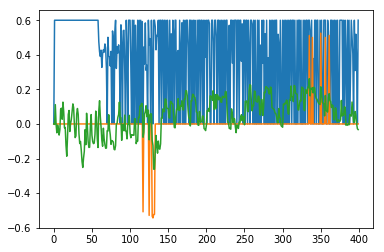

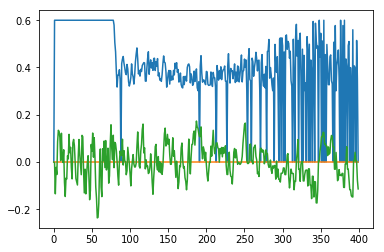

In [268]:
%matplotlib inline

plt.plot(action_history[0][:400])

plt.figure()
plt.plot(action_history[18][:400])
plt.legend()

In [243]:
from rl_and_control.simulation_results.evaluation import calculate_stats_percentages

In [247]:
print("Fe\tFl\tFr\t|psi| > 3")
for i in range(len(action_history)):
    Fe, Fl, Fr, psi_percentage = calculate_stats_percentages(action_history[i])
    print("{0}\t{1}\t{2}\t{3}".format(Fe,Fl,Fr,psi_percentage))

Fe	Fl	Fr	|psi| > 3
0.3751425313568985	0.005701254275940707	0.0068415051311288486	0.38426453819840367
0.4750778816199377	0.16978193146417445	0.0	0.38006230529595014
0.6076233183856502	0.02914798206278027	0.0	0.5201793721973094
0.300820419325433	0.3473108477666363	0.0	0.45214220601640837
0.4082352941176471	0.06705882352941177	0.06823529411764706	0.3835294117647059
0.3814814814814815	0.0	0.06049382716049383	0.4074074074074074
0.5929752066115702	0.38636363636363635	0.0	0.4855371900826446
0.7089397089397089	0.10810810810810811	0.07692307692307693	0.5550935550935551
0.6452762923351159	0.9768270944741533	0.0	0.750445632798574
0.3500557413600892	0.16722408026755853	0.0	0.46265328874024525
0.37058823529411766	0.0	0.09607843137254903	0.3176470588235294
0.3810344827586207	0.20517241379310344	0.0	0.30517241379310345
0.36069651741293535	0.009950248756218905	0.06965174129353234	0.38308457711442784
0.5663265306122449	0.5892857142857143	0.0	0.5663265306122449
0.33952702702702703	0.03209459459459459	0.

In [311]:
from plotting.plotty import *

def add_legend(name_of_data):
    plt.legend(name_of_data)

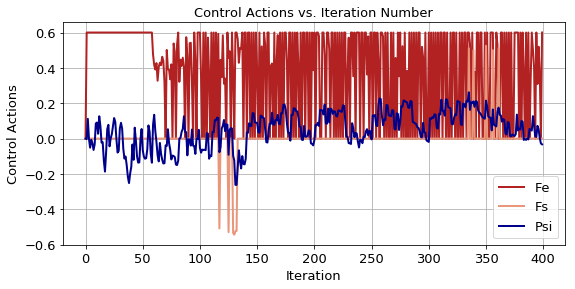

In [313]:
res = Graphing()
fig = res.createFig()

ax = res.addsubplot(fig, 211, "Iteration", "Control Actions")
res.addTitle('Control Actions vs. Iteration Number')

res.plotGraph(None, action_history[0][:400], ax)
add_legend(['Fe', 'Fs', 'Psi'])

plt.show()

# Trajectory

In [440]:
from rl_and_control.simulation_results.evaluation import *

In [441]:
load_path = 'C://Users//REUBS_LEN//PycharmProjects//RocketLanding//rl_and_control//simulation_results//rl_q_learning//high_discretization_longer_state//final_state_history.npy'
state_history = load_numpy_files(load_path)

NameError: name 'load_numpy_files' is not defined

# Multiple Inheritance Testing

In [417]:
class First(object):
    def __init__(self, x):
        #super(First, self).__init__(x) # If there is a call from a class e.g. Third(First, Second), Second will be called first.
        # Specifically, the __init__ will be called since First includes super(...). If super(...) is removed, Second will 
        # still be inherited, but the __init__ function will not be called.
        print("{0} printed from First".format(x))
        print("first")

class Second(object):
    def __init__(self, y):
        #super(Second, self).__init__() # If Third(First, Second) is called and Second includes super(Second, self).__init__(y)
        # An error will pop up since Second is inherited from object, and by default object has no parameter y.
        # On the other hand, if First has a parameter y and Third(Second, First) is called, if Second doesn't include
        # super(Second, self).__init__(y) an error will result too since First expects a parameter.
        print("{0} printed from Second".format(y))
        print("second")
        self.y = y
        
    def print_class(self):
        print("This is the second printing {0}".format(self.y))
    
class Second_Mod(First):
    def __init__(self, x):
        super(Second_Mod, self).__init__(x)
        print("{0} printed from Second Mod".format(x))
        print("second")

class Third_Mod(Second_Mod):
    def __init__(self, x):
        super(Third, self).__init__(x)
        print("{0} printed from Third Mod".format(x))
        print("that's it")
        
class Third(First, Second):
    def __init__(self, x):
        super(Third, self).__init__(x)
        print("{0} printed from Third".format(x))
        print("that's it")

In [418]:
x = Third(3)

3 printed from Second
second
3 printed from Third
that's it


In [399]:
x.print_class()

This is the second printing 3


In [412]:
class First(object):
    def __init__(self, *args, **kwargs):
        super(First, self).__init__(*args, **kwargs)
        print("first")

class Second(object):
    def __init__(self, *args, **kwargs):
        super(Second, self).__init__(*args, **kwargs)
        print("second")
        self.y = args[0]
        
    def print_class(self):
        print("This is the second printing {0}".format(self.y))
    
class Third(First, Second):
    def __init__(self, *args, **kwargs):
        super(Third, self).__init__(*args, **kwargs)
        print("that's it")

In [427]:
x = Third(x)

<__main__.Third object at 0x000001FA43116438> printed from Second
second
<__main__.Third object at 0x000001FA43116438> printed from Third
that's it


In [408]:
x.print_class()

This is the second printing 3


In [424]:
arr = [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1]

In [425]:
np.std(arr)

0.43898557303553082

In [426]:
len(arr)

24

# Instance

In [1]:
import numpy as np

In [3]:
a = np.array([0,0,0])
b = np.array([[0,0,0], [0,0,0]])

In [4]:
a.shape

(3,)

In [5]:
b.shape

(2, 3)

In [6]:
c = [0,0,0]
d = [[0,0,0],[0,0,0]]

In [7]:
len(c)

3

In [8]:
len(d)

2

In [14]:
a.shape == (3,)

True